In [1]:
import numpy as np 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Mean poverty rate of each state
1. Most common 15 Name or Surname of killed people
1. Killed People According to Races
1. Box and Swarm Plots in kill data
1. Kill properties (Count Plot)
    * Number of people by gender
    * Kill weapon
    * Age of killed people
    * Race of killed people
    * Most dangerous cities
    * Most dangerous states
    * Having mental ilness or not for killed people
    * Threat types
    * Flee types
<br>

In [2]:
pr = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
sr = pd.read_csv('ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1. Mean poverty rate of each state

In [3]:
pr.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


**INSTRUCTION-1: replace the "-" with zero.**

In [4]:
pr.poverty_rate.replace(['-'], 0.0, inplace = True)

**INSTRUCTION-2 : Convert type of poverty_rate colum to a numeric type (float).**

In [5]:
pr["poverty_rate"] = pd.to_numeric(pr["poverty_rate"])

In [6]:
pr.dtypes

Geographic Area     object
City                object
poverty_rate       float64
dtype: object

**INSTRUCTION-3 : Plot the Poverty rate of each state. (Demonstrate mean value of each Geogrophic Area (AL, AK, AR).)**

In [7]:
pr.describe().T

,count,mean,std,min,25%,50%,75%,max
poverty_rate,29329.0,16.331259,13.202495,0.0,7.0,13.6,22.4,100.0


In [8]:
pr.groupby('Geographic Area')['poverty_rate'].mean()

Geographic Area
AK    18.678592
AL    20.611795
AR    22.963216
AZ    25.268071
CA    16.888371
CO    13.187773
CT     9.137500
DC    18.000000
DE    12.555844
FL    17.508606
GA    23.663636
HI    13.400662
IA    12.231548
ID    18.076211
IL    13.849342
IN    15.499853
KS    14.719048
KY    20.080000
LA    22.291772
MA     9.546341
MD    10.272394
ME    16.893846
MI    17.900723
MN    13.745736
MO    19.930687
MS    26.884254
MT    16.423288
NC    19.720568
ND    12.131920
NE    12.917414
NH    12.659794
NJ     8.160917
NM    22.507675
NV    12.370992
NY    11.638963
OH    14.826667
OK    20.545895
OR    16.435809
PA    12.487174
RI    10.369444
SC    22.105556
SD    15.745269
TN    19.887209
TX    19.496222
UT    11.724615
VA    14.585835
VT    13.785950
WA    14.825997
WI    12.858687
WV    21.082222
WY     9.063725
Name: poverty_rate, dtype: float64

**INSTRUCTION-3.a.1 : Plot With Pandas Built in method:**

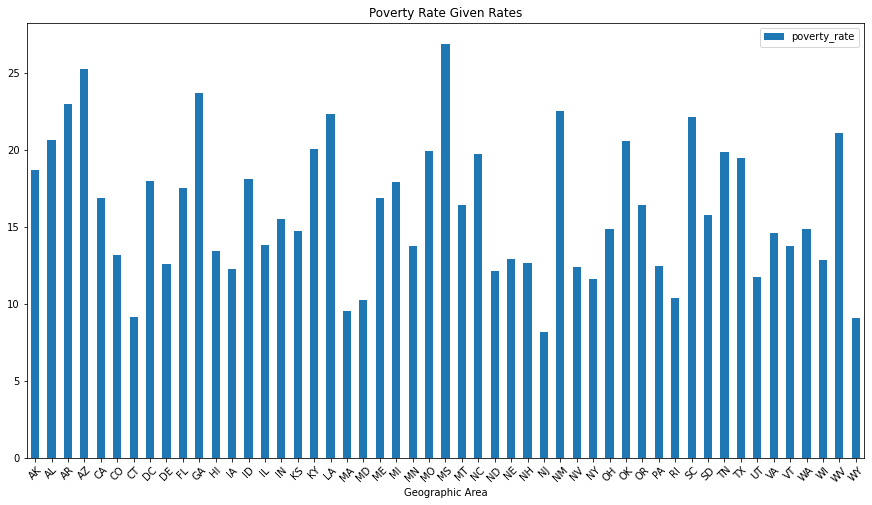

In [9]:
pr.groupby('Geographic Area')['poverty_rate'].mean().plot.bar(figsize= (15,8), rot = 45, title = 'Poverty Rate Given Rates');
plt.legend()

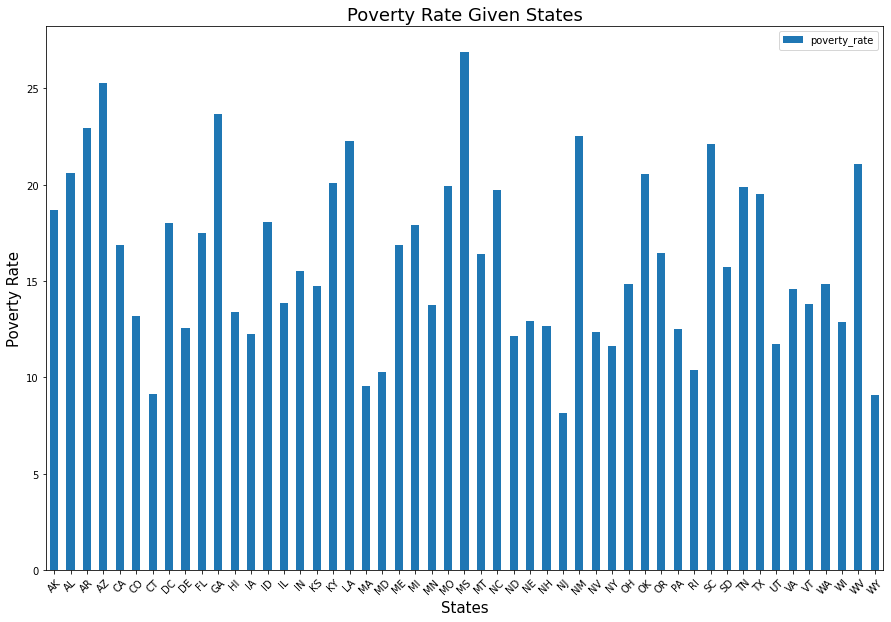

In [10]:
pr.groupby('Geographic Area')[['poverty_rate']].mean().plot.bar(figsize = (15, 10))
plt.xlabel('States', fontsize = 15)
plt.ylabel('Poverty Rate', fontsize = 15)
plt.title('Poverty Rate Given States', fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

In [11]:
pr[]

SyntaxError: invalid syntax (<ipython-input-11-f02d292723c0>, line 1)

**INSTRUCTION-3.a.2 : Plot Sorted Values With Pandas Built in method:**

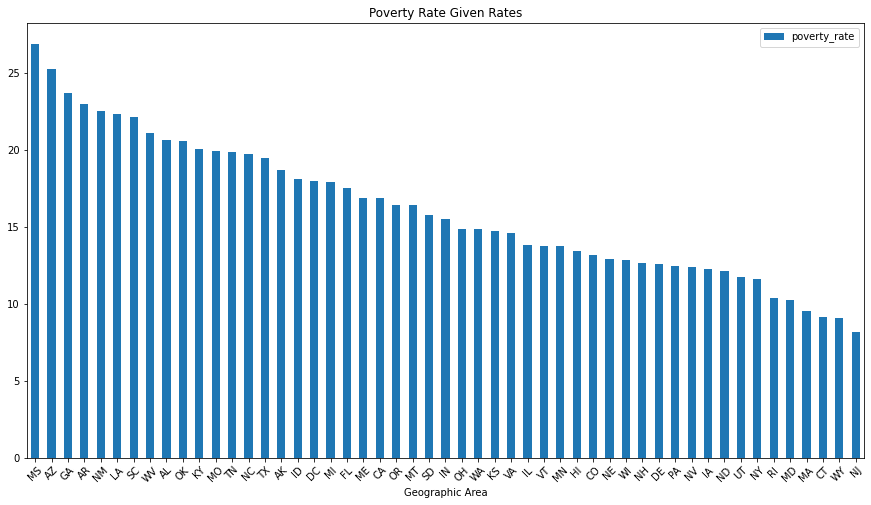

In [12]:
pr.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending = False).plot.bar(figsize= (15,8), rot = 45, title = 'Poverty Rate Given Rates');
plt.legend()

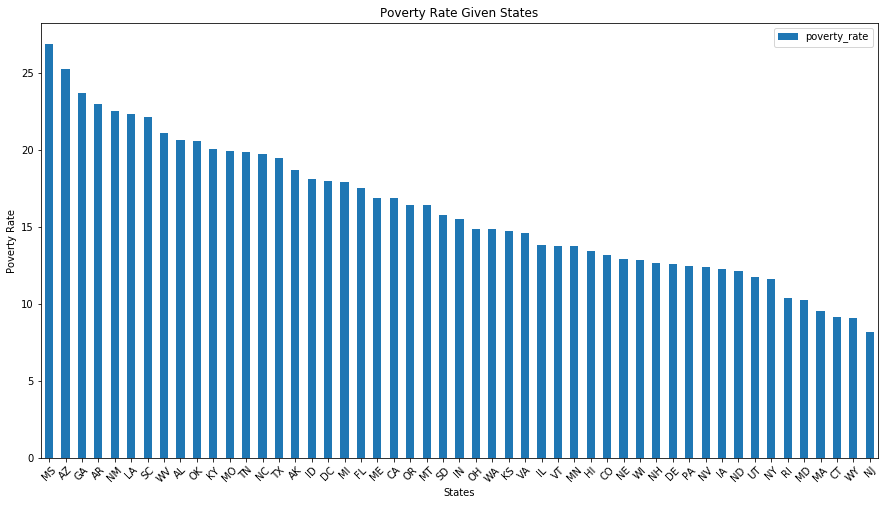

**INSTRUCTION-3.b : Plot Sorted Values With Matplotlib:** 

In [13]:
a = pr.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending = False).index
b = pr.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending = False).values

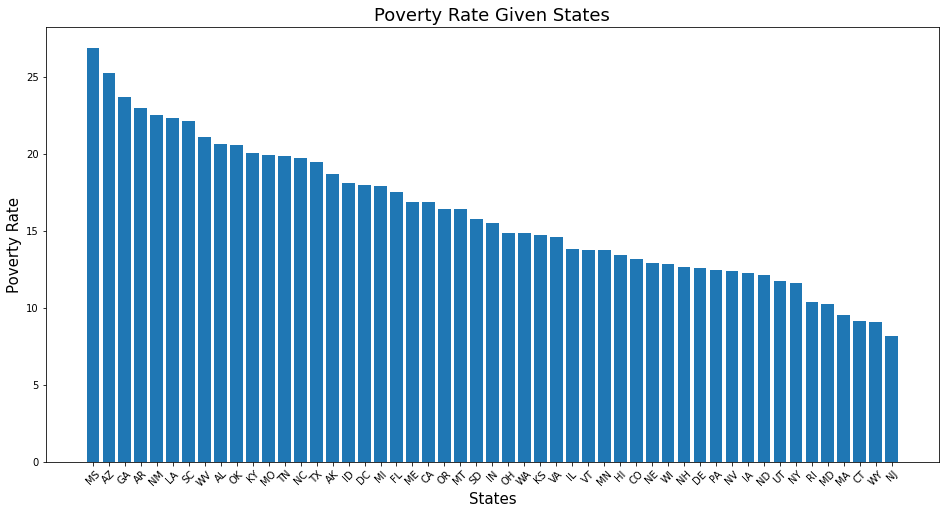

In [14]:
plt.figure(figsize = (16,8))
plt.bar(a,b)
plt.xlabel('States', fontsize = 15)
plt.ylabel('Poverty Rate', fontsize = 15)
plt.title('Poverty Rate Given States', fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

Text(0.5, 1.0, 'Poverty Rate Given States')

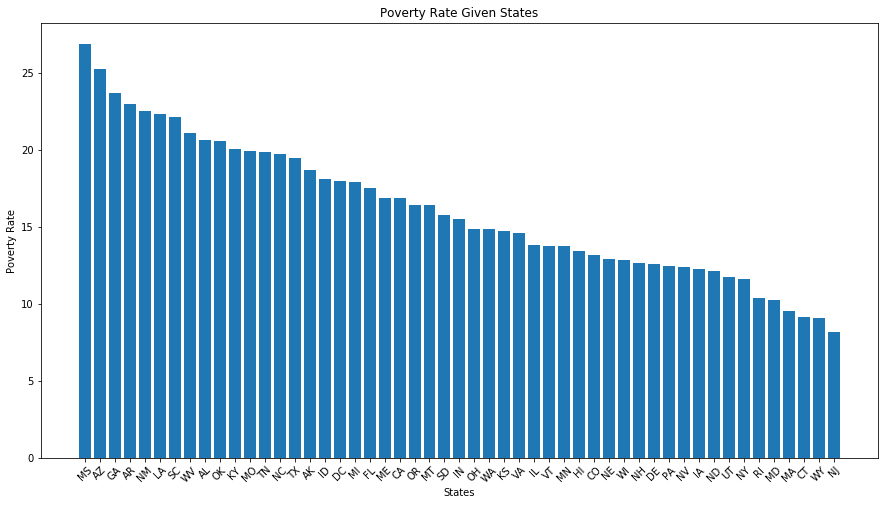

**INSTRUCTION-3.c : Plot Sorted Values With Seaborn** 

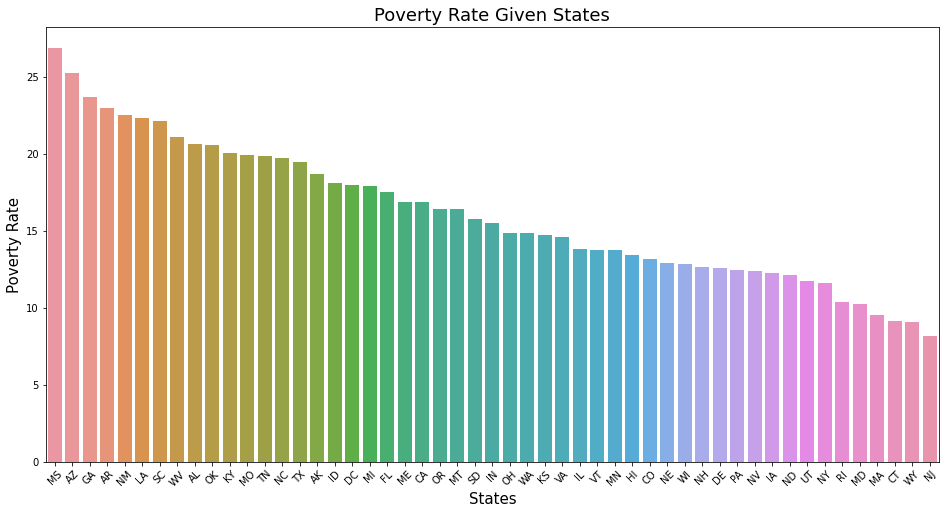

In [15]:
plt.figure(figsize = (16,8))
sns.barplot(a,b)
plt.xlabel('States', fontsize = 15)
plt.ylabel('Poverty Rate', fontsize = 15)
plt.title('Poverty Rate Given States', fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

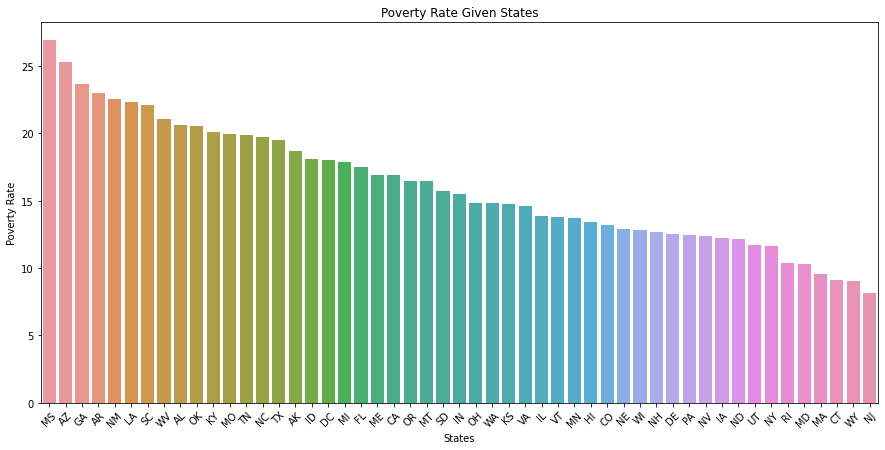

In [16]:
plt.figure(figsize=(15,7))
sns.barplot(x=pr["Geographic Area"], y=pr["poverty_rate"], order=a, ci=None)
plt.xticks(rotation=45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States');

## 2. Most common 15 Name or Surname of killed people 

In [17]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [18]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [19]:
kill.name.value_counts()

TK TK                       49
Brandon Jones                2
Eric Harris                  2
Michael Johnson              2
Daquan Antonio Westbrook     2
                            ..
Clifford Tucker              1
Steven Wickert               1
John H. Fetter               1
Devonte Gates                1
Naway Willy                  1
Name: name, Length: 2481, dtype: int64

In [20]:
# Problem: TK TK is most probably not a name or surname. We will clean them.
pairs = kill.name[kill.name != 'TK TK'].str.split()
pairs.head()

0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

**INSTRUCTION : Plot Most common 15 Name or Surname of killed people** 

In [21]:
surname = []
name = []
for i in pairs:
    surname.append(i[-1])
    name += i[:-1]
total = name + surname

In [22]:
df = pd.DataFrame(pairs)

In [23]:
df.head()

,name
0,"[Tim, Elliot]"
1,"[Lewis, Lee, Lembke]"
2,"[John, Paul, Quintero]"
3,"[Matthew, Hoffman]"
4,"[Michael, Rodriguez]"


In [24]:
df['len'] = df.name.apply(lambda x: len(x))

In [25]:
df.head()

,name,len
0,"[Tim, Elliot]",2
1,"[Lewis, Lee, Lembke]",3
2,"[John, Paul, Quintero]",3
3,"[Matthew, Hoffman]",2
4,"[Michael, Rodriguez]",2


In [26]:
df['len_new'] = df.name.apply(len)

In [27]:
df.head()

,name,len,len_new
0,"[Tim, Elliot]",2,2
1,"[Lewis, Lee, Lembke]",3,3
2,"[John, Paul, Quintero]",3,3
3,"[Matthew, Hoffman]",2,2
4,"[Michael, Rodriguez]",2,2


In [28]:
df.len.value_counts()

2    1602
3     836
4      48
Name: len, dtype: int64

In [29]:
two_names = df.name[df.len == 2]
three_names = df.name[df.len == 3]
four_names = df.name[df.len == 4]

In [30]:
a, b = zip(*two_names)
c,d,e = zip(*three_names)
f,g,h,i = zip(*four_names)

In [31]:
tot_list = a+b+c+d+e+f+g+h+i

In [32]:
name_count = Counter(tot_list)

In [33]:
most_common_names = name_count.most_common(15)

In [34]:
 most_common_names

[('Michael', 91),
 ('David', 57),
 ('James', 57),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 46),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 38),
 ('Richard', 36),
 ('Smith', 36),
 ('Anthony', 32),
 ('Johnson', 32),
 ('J.', 32)]

In [35]:
x,y = zip(*most_common_names)

In [36]:
x,y = list(x), list(y)

In [37]:
# tot_list = [x for sublist in pairs for x in sublist]
# most_com = pd.Series(tot_list).value_counts().head(15)
# most_com

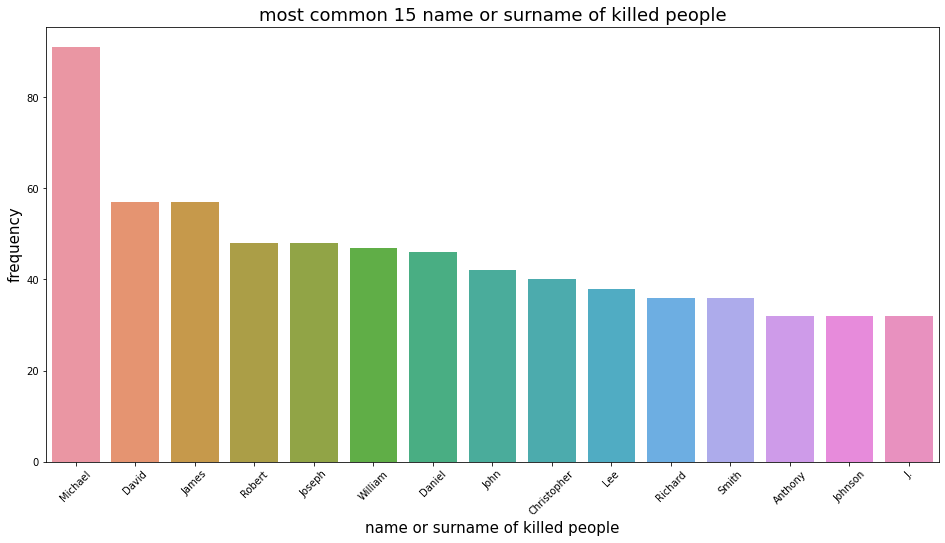

In [38]:
plt.figure(figsize = (16,8))
g = sns.barplot(x,y)
plt.xlabel('name or surname of killed people', fontsize = 15)
plt.ylabel('frequency', fontsize = 15)
plt.title('most common 15 name or surname of killed people', fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+0.5))

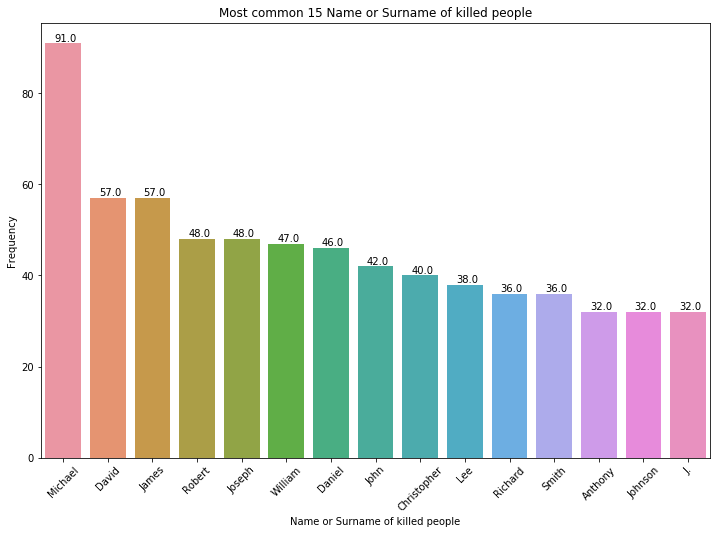

## 3. Killed People According to Races (Pie Chart)

In [39]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [40]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [41]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [42]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [49]:
kill.dropna(inplace = True)

In [50]:
kill.shape

(2254, 14)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart**

In [51]:
race_indx = kill.race.value_counts().index
race_val = kill.race.value_counts().values

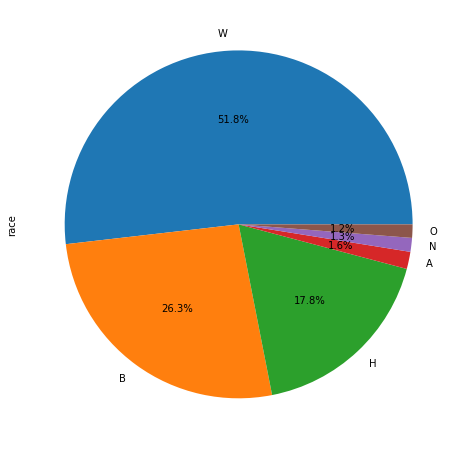

In [52]:
kill['race'].value_counts().plot.pie(autopct='%1.1f%%', figsize = (15,8));

Text(0.5, 1.0, 'Killed People According to Races')

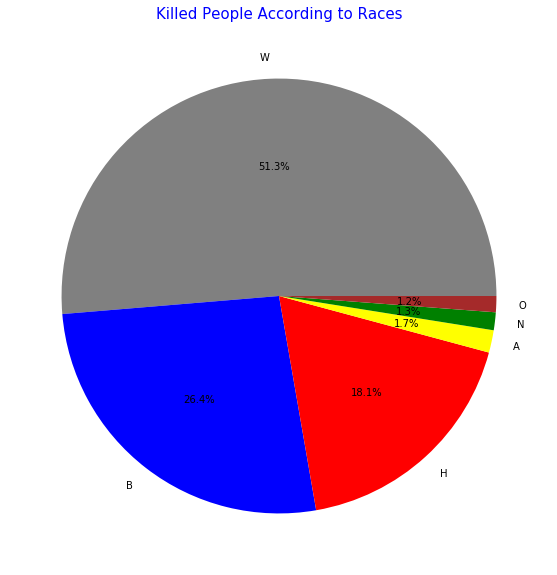

## 4a.Box plot of age in both genders separeted by manner of death.

In [47]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [48]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

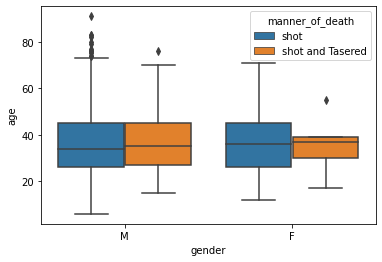

In [53]:
sns.boxplot(x = 'gender', y = 'age', hue = 'manner_of_death', data = kill);

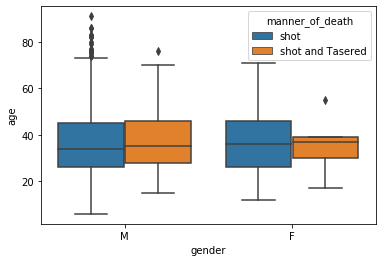

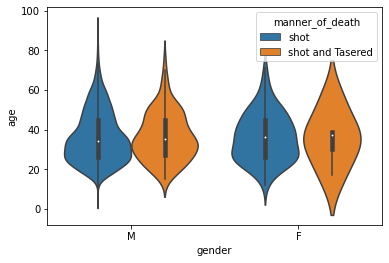

In [55]:
sns.violinplot(x = 'gender', y = 'age', hue = 'manner_of_death', data = kill);

## 4b. Swarm Plot (Do not use in large datasets. The memory will not be enogh!)

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

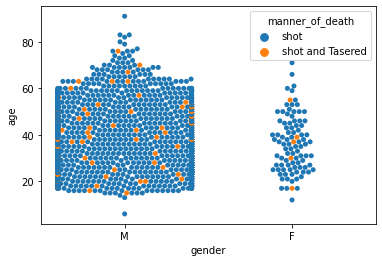

In [56]:
sns.swarmplot(x = 'gender', y = 'age', hue = 'manner_of_death', data = kill);

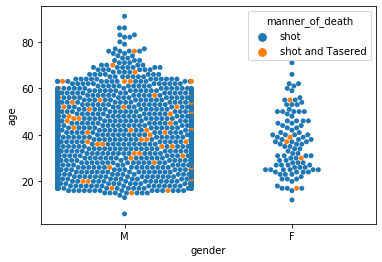

## 5. Kill properties (Count Plots)

**INSTRUCTION-1: Plot number of poeple by gender**

Text(0.5, 1.0, 'gender')

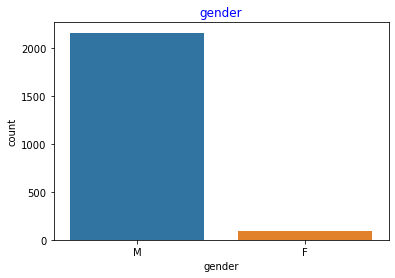

In [62]:
sns.countplot(kill.gender);
plt.title('gender', color = 'blue')

Text(0.5, 1.0, 'gender')

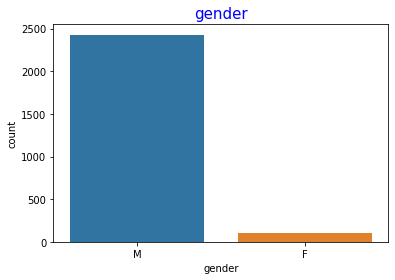

**INSTRUCTION-2: Plot 7 most common kill weapons**

In [63]:
kill.armed.unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'metal pole',
       'Taser', 'metal pipe', 'metal hand tool', 'blunt object',
       'metal stick', 'sharp object', 'meat cleaver', 'carjack', 'chain',
       "contractor's level", 'unknown weapon', 'stapler', 'crossbow',
       'bean-bag gun', 'baseball bat and fireplace poker',
       'straight edge razor', 'gun and knife', 'ax', 'brick',
       'baseball bat', 'hand torch', 'chain saw', 'garden tool',
       'scissors', 'pole', 'pick-axe', 'flashlight', 'spear', 'pitchfork',
       'hatchet and gun', 'rock', 'piece of wood', 'bayonet',
       'glass shard', 'motorcycle', 'metal rake', 'baton', 'crowbar',
       'oar', 'machete and gun', 'air conditioner', 'pole and knife',
       'beer bottle', 'pipe', 'baseba

In [65]:
ii = kill.armed.value_counts()[:7].index
vv = kill.armed.value_counts()[:7].values

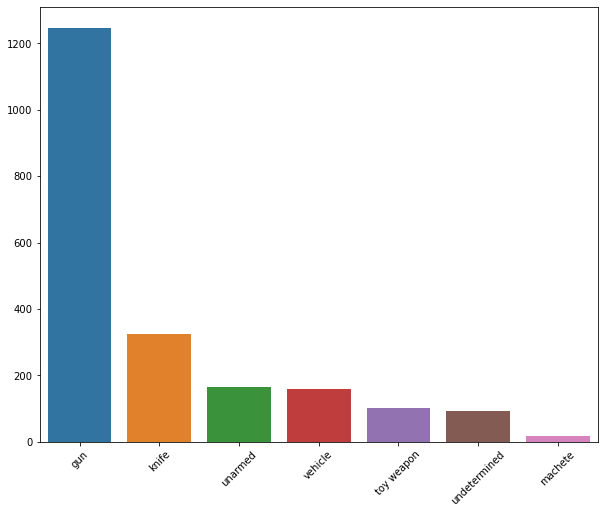

In [73]:
plt.figure(figsize = (10,8))
sns.barplot(ii, vv);
plt.xticks(rotation = 45);

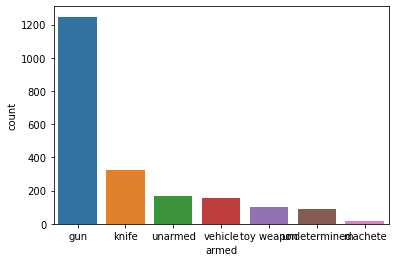

In [71]:
sns.countplot(x="armed", data = kill, order = kill.armed.value_counts().iloc[:7].index);

Text(0.5, 1.0, 'Kill weapon')

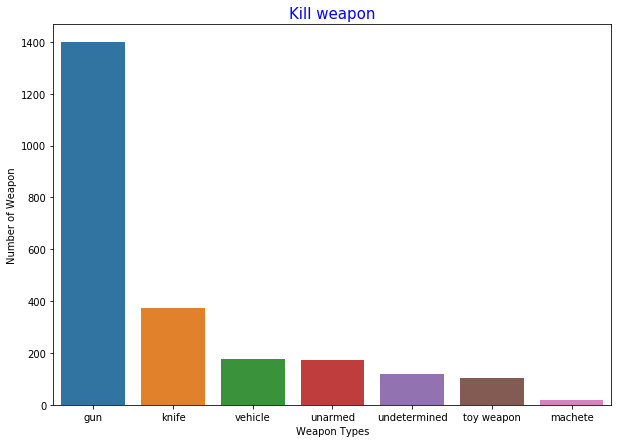

**INSTRUCTION-3: Plot number of age of killed people under two groups : Under 25 and Above 25**

In [74]:
kill['age_cat'] = kill.age.apply(lambda x : 'above 25' if x >= 25 else 'below 25')

In [75]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above 25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above 25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below 25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above 25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above 25


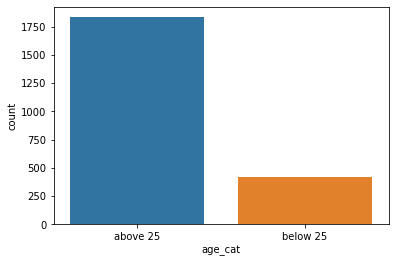

In [77]:
sns.countplot(x= 'age_cat', data = kill);

In [78]:
kill['age_bins'] = pd.cut(x=kill['age'], bins=[0,25,99],labels=["below25", "above25"]);

In [79]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat,age_bins
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above 25,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above 25,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below 25,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above 25,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above 25,above25


Text(0.5, 1.0, 'Age of killed people')

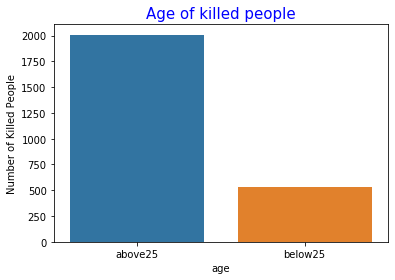

**INSTRUCTION-4: Plot number of killed poeple by race**

Text(0.5, 1.0, 'Race of Killed People')

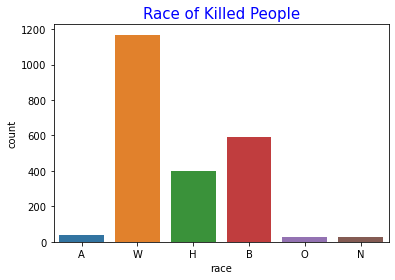

In [81]:
sns.countplot(x = 'race', data = kill);
plt.title("Race of Killed People",color='b',fontsize=15)

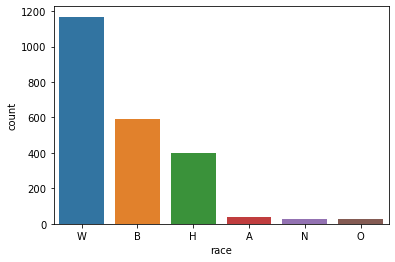

In [82]:
sns.countplot(kill.race, order=kill.groupby("race").race.count().sort_values(ascending=False).index);

Text(0.5, 1.0, 'Race of killed people')

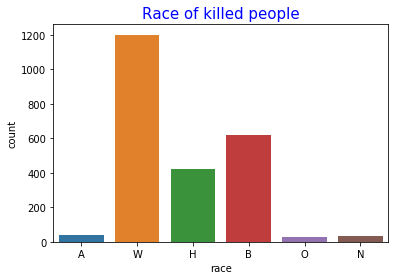

**INSTRUCTION-5: Plot 12 most dangerous cities**

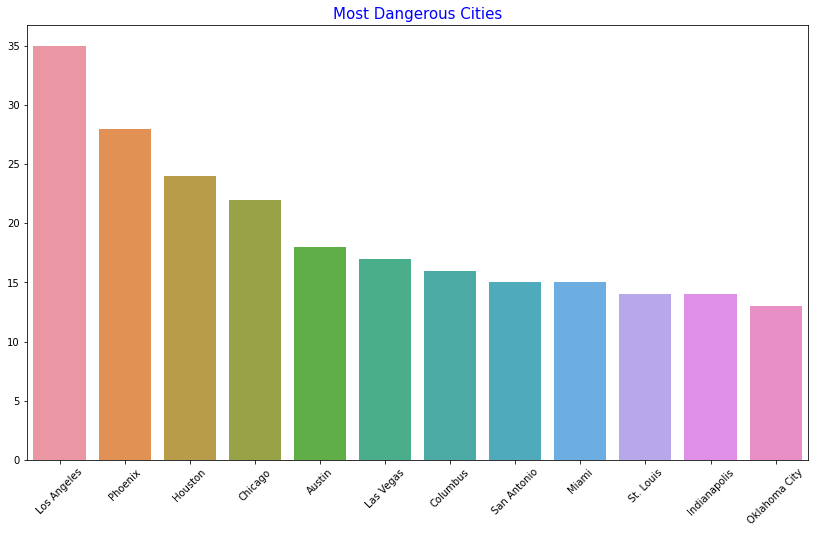

In [89]:
plt.figure(figsize = (14,8))
i = kill.city.value_counts()[:12].index
v = kill.city.value_counts()[:12].values
sns.barplot(i, v);
plt.xticks(rotation=45)
plt.title('Most Dangerous Cities',color = 'blue',fontsize=15);

Text(0.5, 1.0, 'Most dangerous cities')

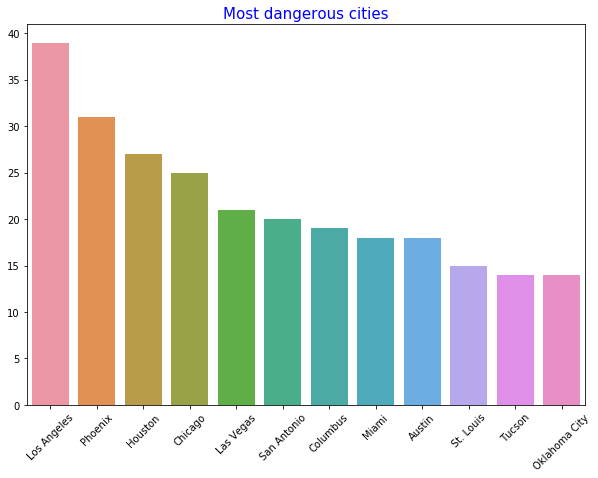

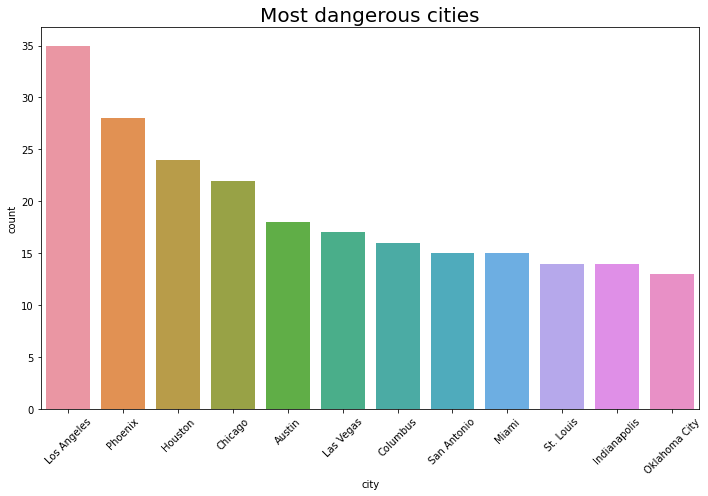

In [91]:
fig, ax = plt.subplots( figsize=(10, 7))
sns.countplot(x='city', data=kill, order=kill.city.value_counts().iloc[:12].index)
ax.set_xticklabels(i, rotation=45);
plt.title('Most dangerous cities', size= 20)
plt.tight_layout()

**INSTRUCTION-6: Plot 20 most dangerous states**

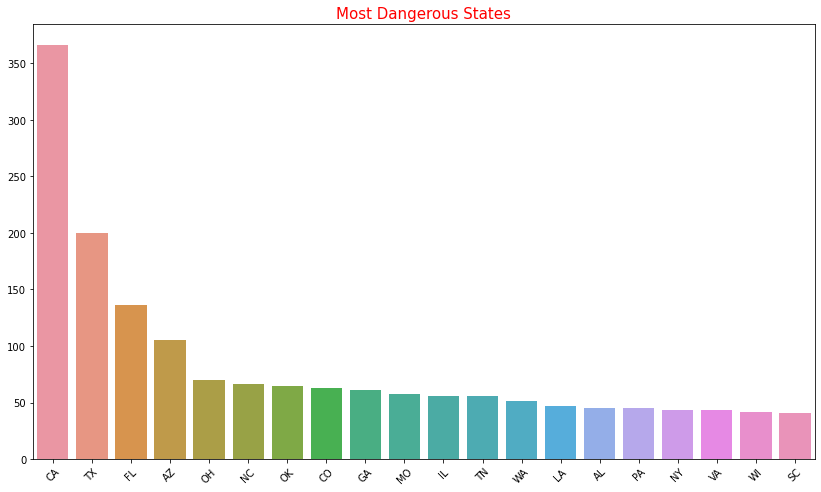

In [92]:
plt.figure(figsize = (14,8))
iii = kill.state.value_counts()[:20].index
vvv = kill.state.value_counts()[:20].values
sns.barplot(iii, vvv);
plt.xticks(rotation=45)
plt.title('Most Dangerous States',color = 'red',fontsize=15);

Text(0.5, 1.0, 'Most dangerous state')

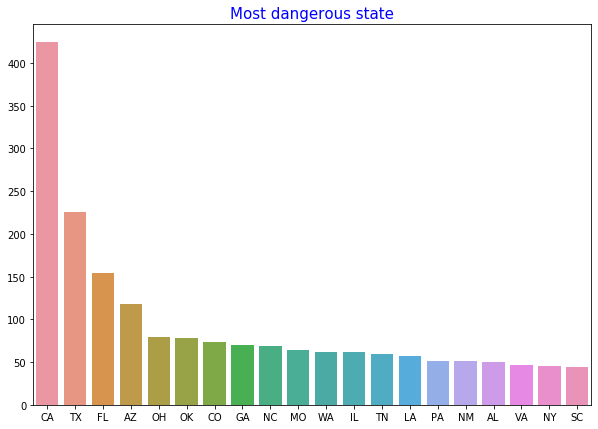

**INSTRUCTION-7: Plot Having mental ilness or not for killed people**

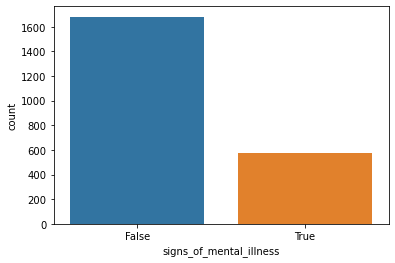

In [93]:
sns.countplot(kill.signs_of_mental_illness);

Text(0.5, 1.0, 'Having mental illness or not')

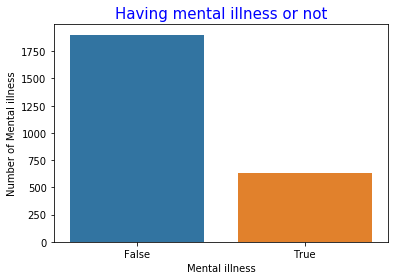

**INSTRUCTION-8: Plot number of Threat Types**

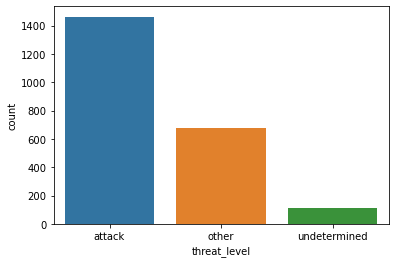

In [94]:
sns.countplot(kill.threat_level);

Text(0.5, 1.0, 'Threat types')

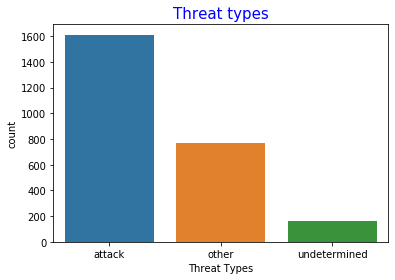

**INSTRUCTION-9: Plot number of Flee Types**

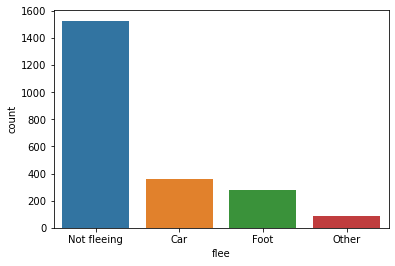

In [95]:
sns.countplot(kill.flee);